# **Import Libraries**

In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve

# from xgboost import XGBClassifier
from pandas import DataFrame


import matplotlib.pyplot as plt

from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import AdaBoostClassifier



In [204]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
#     if axes is None:
#         _, axes = plt.subplots(1, 3, figsize=(20, 5))

    ax1, ax2, ax3 = axes

    ax1.set_title(title)
    if ylim is not None:
        ax1.set_ylim(*ylim)
    ax1.set_xlabel("Training examples")
    ax1.set_ylabel("Accuracy")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
        random_state = 0,
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    print('Accuracy', train_scores_mean[-1], test_scores_mean[-1])

    # Plot learning curve
    ax1.grid()
    ax1.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    ax1.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    ax1.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training"
    )
    ax1.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation"
    )
    ax1.legend(loc="best")

    # Plot n_samples vs fit_times
    ax2.grid()
    ax2.plot(train_sizes, fit_times_mean, "o-")
    ax2.fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    ax2.set_xlabel("Training examples")
    ax2.set_ylabel("Training Time")
    ax2.set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    ax3.grid()
    ax3.plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    ax3.fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    if ylim is not None:
        ax3.set_ylim(*ylim)
    ax3.set_xlabel("Training Time")
    ax3.set_ylabel("Accuracy")
    ax3.set_title("Performance of the model")

    return plt

# **Loading Dataset**

In [9]:
# Load dataset
#df = pd.read_csv('../input/ucidata/crx.data',header=None)
header_names=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
df = pd.read_csv('./Data/crx.data',names=header_names)

# Inspect data
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


##  **Knowing the data**

In [10]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       690 non-null    object 
 1   B       690 non-null    object 
 2   C       690 non-null    float64
 3   D       690 non-null    object 
 4   E       690 non-null    object 
 5   F       690 non-null    object 
 6   G       690 non-null    object 
 7   H       690 non-null    float64
 8   I       690 non-null    object 
 9   J       690 non-null    object 
 10  K       690 non-null    int64  
 11  L       690 non-null    object 
 12  M       690 non-null    object 
 13  N       690 non-null    object 
 14  O       690 non-null    int64  
 15  P       690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [11]:
# summary statistics
df.describe()

,C,H,K,O
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


## **Inspect missing values in the dataset**


In [12]:
# df.head(50)

In [13]:
# df.tail(50)

In [15]:
# for each of the categorical columns, lets see the unique values
# for i in df.columns:
#     #print(i)
#     if df[i].dtype==object:
#         print(df[i].unique())

We can see the null values are represented by $?$ in the dataset.
* Let's first replace $?$ with NaN


In [16]:
df = df.replace('?',np.nan)

In [17]:
## Lets modify the functions to make them more readable 

def missing_values(df):
    ''' This function takes a data frame as input 
    prints the fraction of entries with missing values (NaN)
    prints the list of columns with corresponding number of missing values
    '''
    # Total number of entries (rows X columns) in the dataset
    total= df.size
    #Number of missing values per column
    missingCount = df.isnull().sum()
    #Total number of missing values
    missing_tot = missingCount.sum()
    # Calculate percentage of missing values
    #print('general info of dataframe \n\n\n\n',df.info())
    print(f'Total number of missing values for each column of dataframe: \n \b \b \b',missingCount)
    print("The dataset contains", round(((missing_tot/total) * 100), 2), "%", "missing values.\n\n\n")
    
    
def column_missingdata(df):
    ''' This function takes a data frame as input 
    prints the list of columns with corresponding % of missing values
    '''
    #check for missing values per column
    values=df.isnull().sum()#.sort_values(ascending=False)
    total= df.size
    #percentage of missing values per column
    percentage=(values/total) * 100
    print(f'% of missing values for each column of dataframe: \n \b \b \b',percentage,'\n\n\n')

def plot_missingdata(df:pd.DataFrame, title:str, xlabel:str, ylabel:str):
    ''' This function takes a data frame as input 
    plots the list of columns with corresponding total number of missing values
    '''
    # Let us see what columns have missing values
    # total number of missing values for each dataframe column
    missing = df.isnull().sum() 
    # keeping only the columns with missing values>0 
    missing = missing[missing > 0] 
    # sorting in order of missing values and making the change to original missing series
    missing.sort_values(inplace=True) 
    missing.plot.bar(color='blue')
    plt.title(title, size=15)
    plt.xticks(fontsize=11,rotation=45)
    plt.yticks(fontsize=11)
    plt.xlabel(xlabel, fontsize=13)
    plt.ylabel(ylabel, fontsize=13)
    plt.show()

Total number of missing values for each column of dataframe: 
    A    12
B    12
C     0
D     6
E     6
F     9
G     9
H     0
I     0
J     0
K     0
L     0
M     0
N    13
O     0
P     0
dtype: int64
The dataset contains 0.61 % missing values.



% of missing values for each column of dataframe: 
    A    0.108696
B    0.108696
C    0.000000
D    0.054348
E    0.054348
F    0.081522
G    0.081522
H    0.000000
I    0.000000
J    0.000000
K    0.000000
L    0.000000
M    0.000000
N    0.117754
O    0.000000
P    0.000000
dtype: float64 





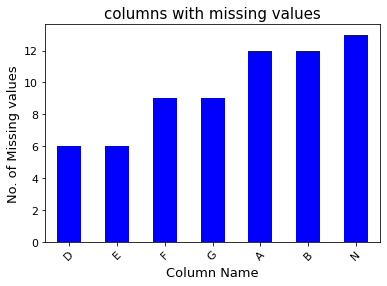

In [11]:
missing_values(df)
column_missingdata(df)
plot_missingdata(df,'columns with missing values','Column Name','No. of Missing values')

In [18]:
def fix_missing_mean(df,col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with it's mean value
    '''
    #replace missing values with mean 
    df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col].fillna(df[col].mean(), inplace = True)    

def fix_missing_mode(df,col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with it's mean value
    '''
    #replace missing values with mode 
    #df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col].fillna(df[col].mode(), inplace = True)    

    
def fix_missing_ffill(df, col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with the value from the previous row
    '''
    #df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col] = df[col].fillna(method='ffill')  
    
def fix_missing_bfill(df, col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with the value from the next row
    '''
    #df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col] = df[col].fillna(method='bfill')     

In [19]:
fix_missing_ffill(df,'A')
fix_missing_ffill(df,'B')
fix_missing_ffill(df,'D')
fix_missing_ffill(df,'E')
fix_missing_ffill(df,'F')
fix_missing_ffill(df,'G')
fix_missing_mean(df,'N')
missing_values(df)

Total number of missing values for each column of dataframe: 
    A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
N    0
O    0
P    0
dtype: int64
The dataset contains 0.0 % missing values.





In [20]:
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [21]:
# Separate target from features
y = df['P']
features = df
features = features.drop(['P'], axis=1)
# Preview features
features.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0


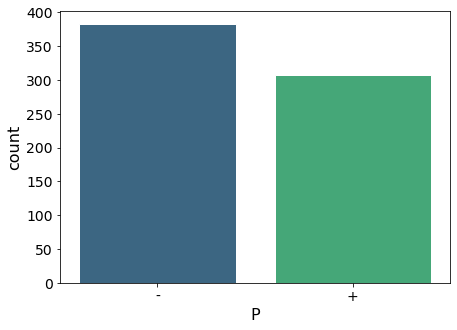

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(7,5), sharex=True)
sns.countplot(data=df, x='P',edgecolor="white",palette="viridis",order=df["P"].value_counts().index)
total = df['P'].value_counts().sum()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('P', fontsize=16)
plt.ylabel('count', fontsize=16)

plt.show()

In [23]:
# List of categorical columns
object_cols = ['A','B','D','E','F','G','I','J','L','M','N']

# ordinal-encode categorical columns
X = features.copy()
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(features[object_cols])

# Preview the ordinal-encoded features
X.head()


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,1.0,156.0,0.000,1.0,0.0,12.0,7.0,1.25,1.0,1.0,1,0.0,0.0,69.0,0
1,0.0,328.0,4.460,1.0,0.0,10.0,3.0,3.04,1.0,1.0,6,0.0,0.0,11.0,560
2,0.0,89.0,0.500,1.0,0.0,10.0,3.0,1.50,1.0,0.0,0,0.0,0.0,97.0,824
3,1.0,125.0,1.540,1.0,0.0,12.0,7.0,3.75,1.0,1.0,5,1.0,0.0,31.0,3
4,1.0,43.0,5.625,1.0,0.0,12.0,7.0,1.71,1.0,0.0,0,0.0,2.0,37.0,0


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       690 non-null    float64
 1   B       690 non-null    float64
 2   C       690 non-null    float64
 3   D       690 non-null    float64
 4   E       690 non-null    float64
 5   F       690 non-null    float64
 6   G       690 non-null    float64
 7   H       690 non-null    float64
 8   I       690 non-null    float64
 9   J       690 non-null    float64
 10  K       690 non-null    int64  
 11  L       690 non-null    float64
 12  M       690 non-null    float64
 13  N       690 non-null    float64
 14  O       690 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 81.0 KB


<AxesSubplot:>

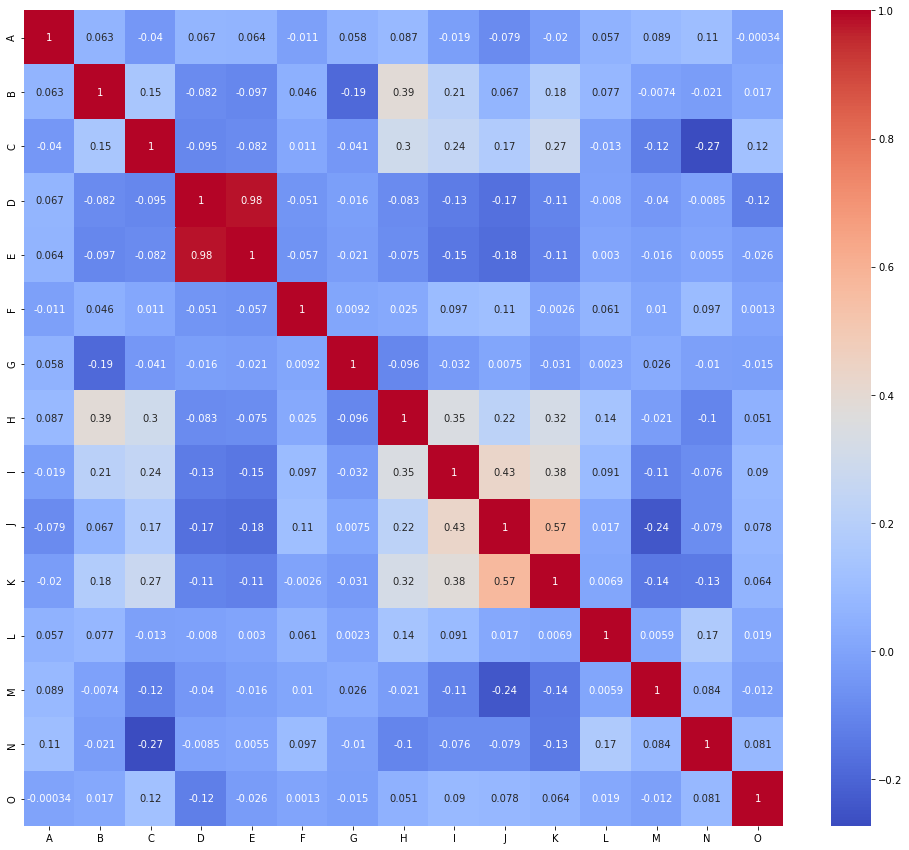

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(17,15))
sns.heatmap(X.corr(), annot = True, cmap = 'coolwarm')

In [26]:
# X = X.drop([ 'D', 'E', 'F', 'M', 'N'], axis = 1)
xTrain, xTest, yTrain, yTest = train_test_split(X, y,test_size=0.20,random_state=2)

## **Classifiers**

#### **Decision Tree**

1 Train score: 0.8426501035196687 Test score: 0.8840579710144928
2 Train score: 0.8426501035196687 Test score: 0.8840579710144928
3 Train score: 0.8488612836438924 Test score: 0.8743961352657005
4 Train score: 0.8778467908902692 Test score: 0.8695652173913043
5 Train score: 0.8985507246376812 Test score: 0.8405797101449275
6 Train score: 0.9213250517598344 Test score: 0.821256038647343
7 Train score: 0.9461697722567288 Test score: 0.8115942028985508
8 Train score: 0.9627329192546584 Test score: 0.8019323671497585
9 Train score: 0.968944099378882 Test score: 0.8115942028985508


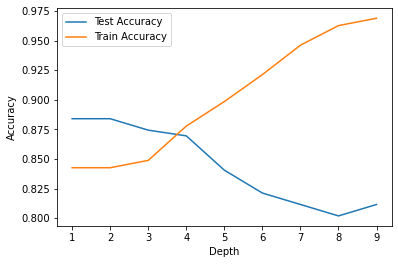

In [41]:
train_acc=[]
test_acc=[]
list_score=[]
p=[]

for i in range(1, 10):
    
    dtc = DecisionTreeClassifier(max_depth = i ,random_state = 0)

    dtc.fit(xTrain, yTrain)

    train_pred = dtc.predict(xTrain)
    #train_acc.append(score(train_pred, yTrain))
    
    test_pred = dtc.predict(xTest)
    #test_acc.append(score(test_pred, yTest))
    test_acc = accuracy_score(yTest, test_pred)
    train_acc = accuracy_score(yTrain, train_pred)
    print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_pred, yTrain),accuracy_score(test_pred, yTest)]) 
    
    
df2 = DataFrame (list_score,columns=['Depth','Train Accuracy','Test Accuracy'])
plt.plot(df2['Depth'],df2['Test Accuracy'],label='Test Accuracy')
plt.plot(df2['Depth'],df2['Train Accuracy'],label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend() 

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

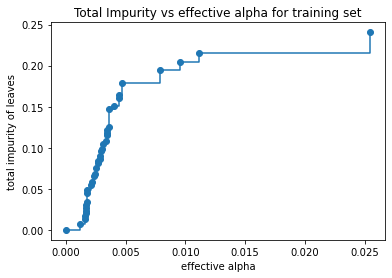

In [235]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(xTrain, yTrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

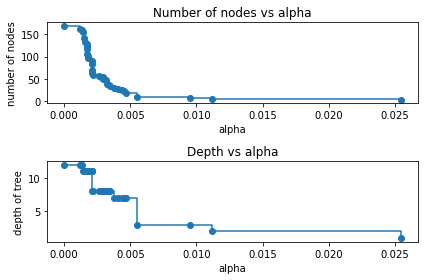

In [64]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(xTrain, yTrain)
    clfs.append(clf)
    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

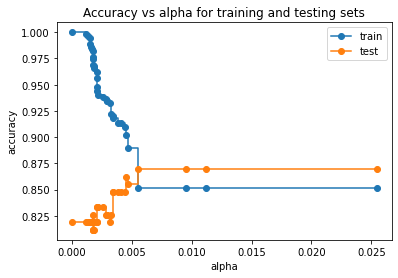

In [63]:
train_scores = [clf.score(xTrain, yTrain) for clf in clfs]
test_scores = [clf.score(xTest, yTest) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [233]:
# ccp_alphas, test_scores

#### **Ada Boost**

In [262]:
clfs = []
for ccp_alpha in ccp_alphas:
    base = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf = AdaBoostClassifier(base_estimator=base, random_state=0, n_estimators=100)
    clf.fit(xTrain, yTrain)
    clfs.append(clf)
    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# node_counts = [clf.tree_.node_count for clf in clfs]
# depth = [clf.tree_.max_depth for clf in clfs]
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
# ax[0].set_xlabel("alpha")
# ax[0].set_ylabel("number of nodes")
# ax[0].set_title("Number of nodes vs alpha")
# ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
# ax[1].set_xlabel("alpha")
# ax[1].set_ylabel("depth of tree")
# ax[1].set_title("Depth vs alpha")
# fig.tight_layout()

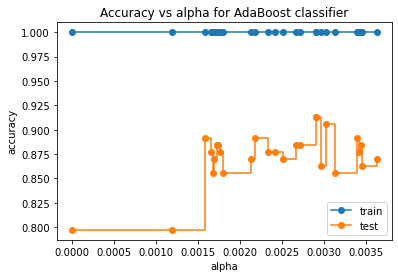

0.9130434782608695 0.9130434782608695 0.0028985507246376803


In [263]:
train_scores = [clf.score(xTrain, yTrain) for clf in clfs]
test_scores = [clf.score(xTest, yTest) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for AdaBoost classifier")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()
print(max(test_scores), test_scores[18], ccp_alphas[18])

#### **KNN**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(xTrain,yTrain)

train_predict = knn.predict(xTrain)
test_predict = knn.predict(xTest)

test_acc = accuracy_score(yTest, test_predict)
train_acc = accuracy_score(yTrain, train_predict)
print('Train score:',train_acc,'Test score:',test_acc)
# Train score: 0.7743271221532091 Test score: 0.6908212560386473

Train score: 0.7867494824016563 Test score: 0.7101449275362319


Train score: 0.8343685300207039 Test score: 0.6135265700483091
2 Train score: 0.8343685300207039 Test score: 0.6135265700483091
Train score: 0.8178053830227743 Test score: 0.6763285024154589
3 Train score: 0.8178053830227743 Test score: 0.6763285024154589
Train score: 0.7908902691511387 Test score: 0.714975845410628
4 Train score: 0.7908902691511387 Test score: 0.714975845410628
Train score: 0.7867494824016563 Test score: 0.7101449275362319
5 Train score: 0.7867494824016563 Test score: 0.7101449275362319
Train score: 0.7660455486542443 Test score: 0.6908212560386473
6 Train score: 0.7660455486542443 Test score: 0.6908212560386473
Train score: 0.7494824016563147 Test score: 0.7004830917874396
7 Train score: 0.7494824016563147 Test score: 0.7004830917874396
Train score: 0.7370600414078675 Test score: 0.6811594202898551
8 Train score: 0.7370600414078675 Test score: 0.6811594202898551
Train score: 0.7432712215320911 Test score: 0.6666666666666666
9 Train score: 0.7432712215320911 Test scor

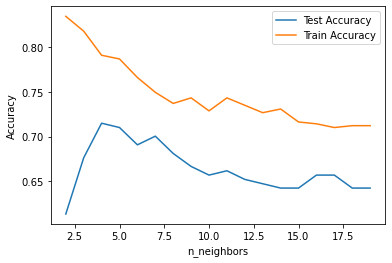

In [25]:
from sklearn.neighbors import KNeighborsClassifier

train_acc=[]
test_acc=[]
list_score=[]

for i in range(2, 20):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(xTrain,yTrain)

    train_predict = knn.predict(xTrain)
    test_predict = knn.predict(xTest)

    test_acc = accuracy_score(yTest, test_predict)
    train_acc = accuracy_score(yTrain, train_predict)
    print('Train score:',train_acc,'Test score:',test_acc)
    print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_predict, yTrain),accuracy_score(test_predict, yTest)]) 
    
    
df3 = DataFrame (list_score,columns=['n_neighbors','Train Accuracy','Test Accuracy'])
plt.plot(df3['n_neighbors'],df3['Test Accuracy'],label='Test Accuracy')
plt.plot(df3['n_neighbors'],df3['Train Accuracy'],label='Train Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()    

#### **Logistic Regression**

In [26]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledxTrain = scaler.fit_transform(xTrain)
rescaledxTest = scaler.fit_transform(xTest)


In [27]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledxTrain, yTrain)

LogisticRegression()

In [28]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledxTest)
y_pred1 = logreg.predict(rescaledxTrain)

# Get the accuracy score of logreg model and print it
print("Test: Accuracy = ", logreg.score(rescaledxTest,yTest))
print("Train: Accuracy = ", logreg.score(rescaledxTrain,yTrain))

# Print the confusion matrix of the logreg model
confusion_matrix(yTest,y_pred)

Test: Accuracy =  0.8840579710144928
Train: Accuracy =  0.8426501035196687


array([[94,  8],
       [16, 89]])

In [29]:
svm_clf = svm.SVC(kernel='linear')
# clf.fit(xTrain, yTrain)
# clf.score(xTest,yTest)


# mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 10, 2), random_state=1)
mlp_clf = MLPClassifier(hidden_layer_sizes=(26,150,26),  max_iter=1000, solver='lbfgs', activation='relu', alpha=0.7, 
                 learning_rate_init=0.5,  verbose=False, momentum=0.1, random_state=42)
mlp_clf.fit(xTrain, yTrain)
mlp_clf.score(xTest,yTest)
# 0.7922705314009661

/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.782608695652174


| Model | Train Accuracy | Test Accuracy |
| --- | --- | --- |
| **Logistic Regression** | 0.86 | 0.88|
| **Decision Tree** | 0.85 | 0.86 |
| **Gradiant Boost** | 0.98 | 0.87|
| **XGBoost** | 1.0 | 0.87|
| **KNN** | 0.73 | 0.72|



Accuracy 1.0 0.8681159420289856


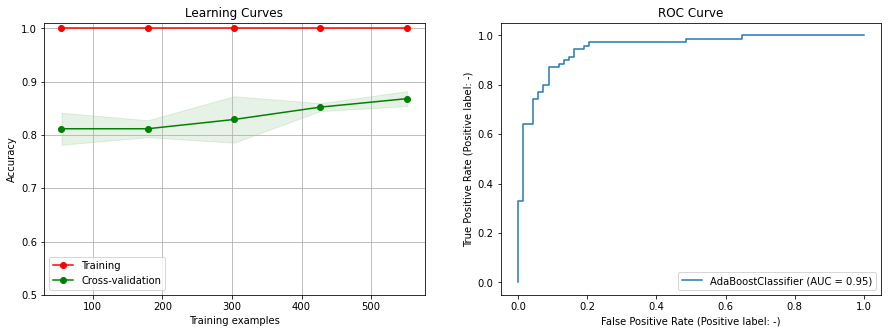

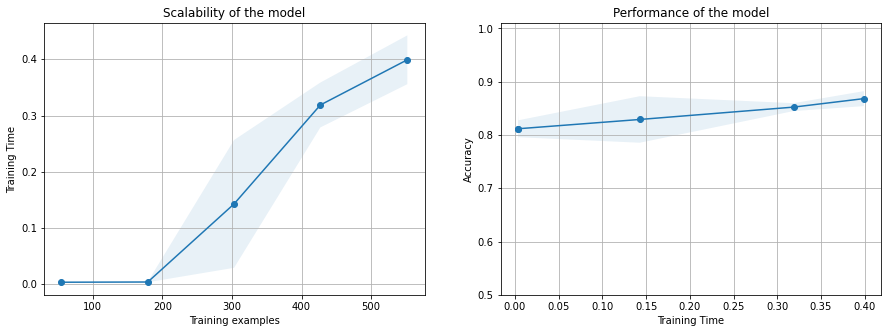

In [275]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# classifier = DecisionTreeClassifier(random_state=0, ccp_alpha=0.00553785)
base = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0028)
classifier = AdaBoostClassifier(base_estimator=base, n_estimators=100, random_state=0)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig2, axes2 = plt.subplots(1, 2, figsize=(15, 5))


plot_learning_curve(
    classifier, "Learning Curves", X, y, axes=[axes[0], axes2[0], axes2[1]], ylim=(0.5, 1.01), cv=cv, n_jobs=4
)

classifier.fit(xTrain, yTrain)
plot_roc_curve(classifier, xTest, yTest, ax=axes[1])
axes[1].set_title('ROC Curve')

fig.savefig('DT1.jpg')
fig2.savefig('DT2.jpg')